In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']=(100)
warnings.filterwarnings('ignore')

In [2]:
# reading data
airbnb = pd.read_csv('airbnb prices.csv')

In [3]:
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

### Data Cleaning

In [5]:
# there are multiple null values in the data which are required
# to be treated
airbnb.isna().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

In [6]:
# shape of data
airbnb.shape

(18723, 20)

In [7]:
# Removing the columns that are not important
airbnb.drop(columns=['room_id','survey_id','host_id','city','country','borough','bathrooms','minstay','location'],inplace=True)

In [8]:
airbnb.isna().sum()

room_type                0
neighborhood             0
reviews                  0
overall_satisfaction     0
accommodates             0
bedrooms                 0
price                    0
name                    52
last_modified            0
latitude                 0
longitude                0
dtype: int64

In [9]:
# Finding correlation with price which can be used for prediction further
# Accommodates and Bedrooms are the most important columns in the dataset
airbnb.corr()['price'].sort_values(ascending=False)

price                   1.000000
accommodates            0.500350
bedrooms                0.446144
longitude               0.021770
latitude                0.013759
overall_satisfaction   -0.044775
reviews                -0.084516
Name: price, dtype: float64

In [10]:
# Types of room2
airbnb['room_type'].value_counts()

Entire home/apt    14978
Private room        3682
Shared room           63
Name: room_type, dtype: int64

In [11]:
# Most Popular Neighborhood 
airbnb['neighborhood'].value_counts()

De Baarsjes / Oud West                    3289
De Pijp / Rivierenbuurt                   2378
Centrum West                              2225
Centrum Oost                              1730
Westerpark                                1430
Noord-West / Noord-Midden                 1418
Oud Oost                                  1169
Bos en Lommer                              988
Oostelijk Havengebied / Indische Buurt     921
Watergraafsmeer                            517
Oud Noord                                  494
Ijburg / Eiland Zeeburg                    378
Slotervaart                                349
Buitenveldert / Zuidas                     250
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    195
Osdorp                                     163
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             99
Bijlmer Oost                                97
Gaasperdam / 

In [12]:
airbnb.drop(airbnb[airbnb['reviews']<2].index,axis=0,inplace=True)

In [13]:
airbnb.shape

(14229, 11)

In [14]:
airbnb['overall_satisfaction'].value_counts().sort_index()

0.0    1254
1.0       1
1.5       1
2.5       1
3.0      19
3.5     109
4.0     577
4.5    4559
5.0    7708
Name: overall_satisfaction, dtype: int64

In [15]:
airbnb[airbnb['overall_satisfaction']<3].index

Int64Index([    7,     8,    15,    25,    26,    38,    47,    63,    71,
               72,
            ...
            18457, 18465, 18479, 18481, 18531, 18592, 18641, 18672, 18680,
            18681],
           dtype='int64', length=1257)

In [16]:
airbnb.drop(airbnb[airbnb['overall_satisfaction']<3].index,inplace=True)

In [17]:
airbnb.shape

(12972, 11)

In [18]:
airbnb['accommodates'].mean()

2.876503237742831

In [19]:
airbnb['accommodates'].median()

2.0

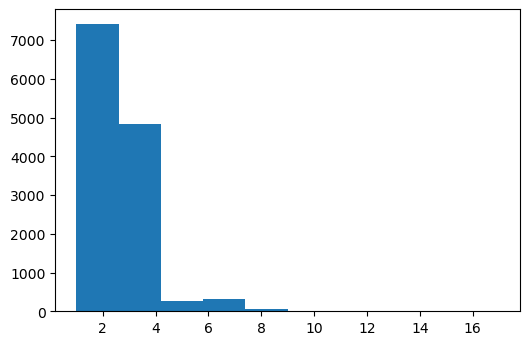

In [20]:
# Most of the outliers are on the right side of the distribution
plt.hist(airbnb['accommodates']) # right skewed
plt.show()

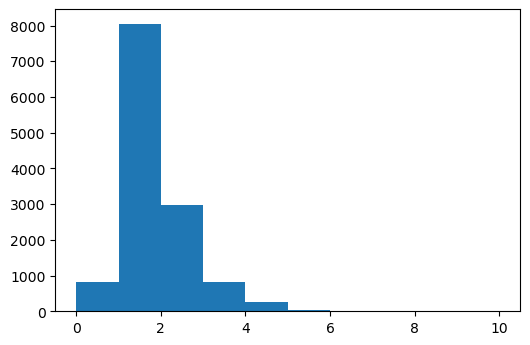

In [21]:
plt.hist(airbnb['bedrooms']) #right skewed
plt.show()

In [22]:
airbnb['price'].describe()

count    12972.000000
mean       162.714539
std         91.574750
min         12.000000
25%        108.000000
50%        144.000000
75%        181.000000
max       1920.000000
Name: price, dtype: float64

In [23]:
162+3*91

435

In [24]:
162-3*91

-111

<AxesSubplot:xlabel='price'>

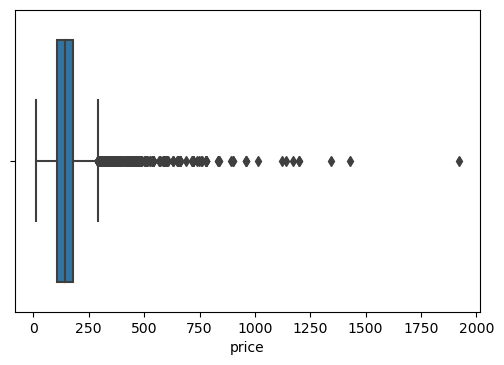

In [25]:
sns.boxplot(airbnb['price'])

In [26]:
airbnb['name'].value_counts()

Amsterdam                                           15
Lovely apartment in Amsterdam                        7
Cosy apartment in Amsterdam                          7
Beautiful apartment in Amsterdam                     7
Lovely apartment near Vondelpark                     6
                                                    ..
Modern Apartment at Vondelpark                       1
Cozy, light and great located apartment in East      1
100m2 appartment with garden, middle of de Pijp.     1
Cute apartment with balcony near city centre         1
Canal view apartment with balcony                    1
Name: name, Length: 12678, dtype: int64

In [27]:
airbnb.corr()['price'].sort_values()

reviews                -0.100830
latitude                0.020153
longitude               0.032489
overall_satisfaction    0.097433
bedrooms                0.545158
accommodates            0.584450
price                   1.000000
Name: price, dtype: float64

In [28]:
airbnb.shape

(12972, 11)

In [29]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12972 entries, 0 to 18722
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             12972 non-null  object 
 1   neighborhood          12972 non-null  object 
 2   reviews               12972 non-null  int64  
 3   overall_satisfaction  12972 non-null  float64
 4   accommodates          12972 non-null  int64  
 5   bedrooms              12972 non-null  float64
 6   price                 12972 non-null  float64
 7   name                  12943 non-null  object 
 8   last_modified         12972 non-null  object 
 9   latitude              12972 non-null  float64
 10  longitude             12972 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.2+ MB


In [30]:
airbnb.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,12972.000000,12972.000000,12972.000000,12972.000000,12972.000000,12972.000000,12972.000000
mean,23.851526,4.764261,2.876503,1.376426,162.714539,52.365656,4.888191
std,38.172347,0.318658,1.306778,0.841127,91.574750,0.014835,0.033510
min,3.000000,3.000000,1.000000,0.000000,12.000000,52.297203,4.763264
25%,6.000000,4.500000,2.000000,1.000000,108.000000,52.355801,4.865026
50%,12.000000,5.000000,2.000000,1.000000,144.000000,52.365117,4.885787
75%,25.000000,5.000000,4.000000,2.000000,181.000000,52.375077,4.906483
max,532.000000,5.000000,17.000000,10.000000,1920.000000,52.424641,5.027689


In [31]:
airbnb_new = airbnb.copy()

In [32]:
airbnb_new.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude
0,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491
1,Shared room,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120
3,Shared room,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028
5,Shared room,De Pijp / Rivierenbuurt,184,4.5,2,1.0,102.0,Beautiful apartment,2017-07-23 13:06:19.663975,52.342265,4.897126
6,Shared room,Oostelijk Havengebied / Indische Buurt,67,5.0,16,1.0,462.0,"LOTUS, Classic Dutch Saling Barge",2017-07-23 13:06:09.988016,52.377552,4.930418


In [33]:
airbnb_new.to_csv('airbnb_new.csv')

In [34]:
# Most of the users of Airbnb prefer Entire home / apt 
airbnb_new['room_type'].value_counts()

Entire home/apt    10182
Private room        2755
Shared room           35
Name: room_type, dtype: int64

In [35]:
airbnb_new.drop(airbnb_new[airbnb_new['bedrooms']==0.0].index,inplace=True)

In [36]:
airbnb_new.groupby('room_type').agg({'price':['mean','median']})

price       
                       mean median
room_type                         
Entire home/apt  181.208082  156.0
Private room     103.587000   96.0
Shared room      100.828571   84.0

In [37]:
airbnb_new.groupby('accommodates').agg({'price':'mean','reviews':'sum','bedrooms':'sum'})

,price,reviews,bedrooms
accommodates,,,
1,73.827103,7159,216.0
2,130.078679,166485,6818.0
3,149.104046,25862,1457.0
4,209.927118,70825,7197.0
5,238.741818,4380,719.0
6,305.633803,6015,864.0
7,339.827586,789,102.0
8,411.771429,1108,263.0
9,467.200000,134,20.0


In [38]:
airbnb_new.groupby(['accommodates','bedrooms']).mean()['price']

accommodates  bedrooms
1             1.0           73.636792
              2.0           94.000000
2             1.0          129.698769
              2.0          140.158590
              3.0          141.900000
                             ...     
16            7.0         1920.000000
              8.0          522.000000
              9.0          780.000000
              10.0         446.750000
17            5.0          420.000000
Name: price, Length: 63, dtype: float64

In [39]:
airbnb_new.groupby(['neighborhood']).agg({'price':['min','mean','max']})

price                    
                                         min        mean     max
neighborhood                                                    
Bijlmer Centrum                         24.0   92.161290   342.0
Bijlmer Oost                            36.0   85.587302   420.0
Bos en Lommer                           23.0  127.030166   480.0
Buitenveldert / Zuidas                  42.0  132.116438   342.0
Centrum Oost                            44.0  198.144357  1428.0
Centrum West                            35.0  211.018480  1920.0
De Aker / Nieuw Sloten                  45.0  118.285714   359.0
De Baarsjes / Oud West                  24.0  159.176944  1343.0
De Pijp / Rivierenbuurt                 21.0  168.227510   960.0
Gaasperdam / Driemond                   59.0  127.300000   396.0
Geuzenveld / Slotermeer                 34.0  109.762712   355.0
Ijburg / Eiland Zeeburg                 38.0  174.703883   763.0
Noord Oost                              38.0  127.921260   300.0
Noord West                              36.0  123.026316   361.0
Noord-West / Noord-Midden               36.0  178.785877  1170.0
Oostelijk Havengebied / Indische Buurt  12.0  142.990323   780.0
Osdorp                                  29.0  109.292929   420.0
Oud Noord                               42.0  155.424342   834.0
Oud Oost                                35.0  149.329949   512.0
Slotervaart                             36.0  130.708134   479.0
Watergraafsmeer                         24.0  158.170732   714.0
Westerpark                              48.0  157.317588  1200.0
Westpoort                               93.0  129.125000   216.0

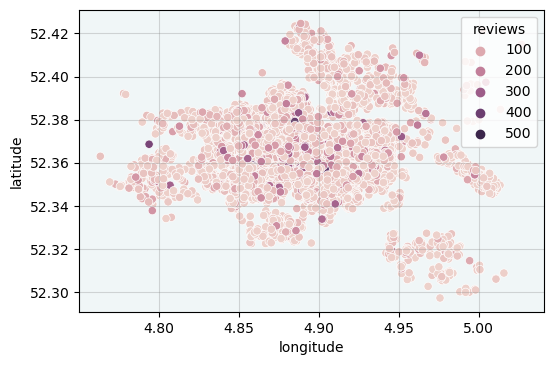

In [40]:
sns.scatterplot(y=airbnb_new['latitude'],x=airbnb_new['longitude'],hue=airbnb_new['reviews'],data=airbnb_new)
ax=plt.axes()
ax.set_facecolor('#F0F6F7FF')
plt.grid(color='gray',alpha=0.3)
plt.show()

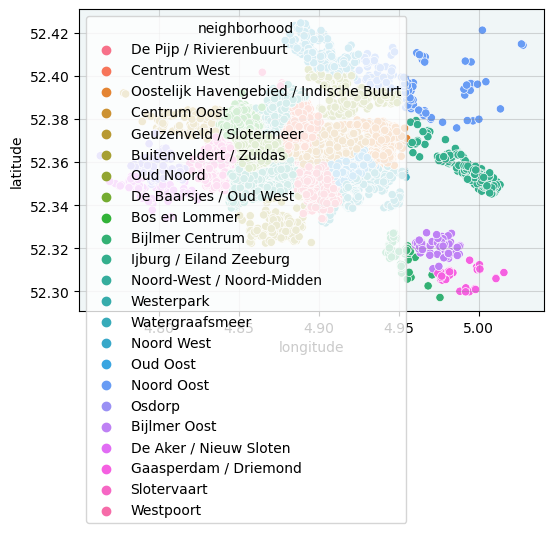

In [41]:
sns.scatterplot(y=airbnb_new['latitude'],x=airbnb_new['longitude'],hue=airbnb_new['neighborhood'],data=airbnb_new)
ax=plt.axes()
ax.set_facecolor('#F0F6F7FF')
plt.grid(color='gray',alpha=0.3)
plt.show()

In [43]:
airbnb_new['neighborhood'].value_counts()

De Baarsjes / Oud West                    2238
De Pijp / Rivierenbuurt                   1534
Centrum West                              1461
Centrum Oost                              1143
Westerpark                                 995
Noord-West / Noord-Midden                  878
Oud Oost                                   788
Bos en Lommer                              663
Oostelijk Havengebied / Indische Buurt     620
Oud Noord                                  304
Watergraafsmeer                            246
Slotervaart                                209
Ijburg / Eiland Zeeburg                    206
Noord West                                 152
Buitenveldert / Zuidas                     146
Noord Oost                                 127
Geuzenveld / Slotermeer                    118
Osdorp                                      99
De Aker / Nieuw Sloten                      70
Bijlmer Oost                                63
Bijlmer Centrum                             62
Gaasperdam / 